In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
import seaborn as sns
from sklearn.cluster import KMeans

In [49]:
# reading csv files
data =  pd.read_csv('data\zoo\zoo.data', sep=",", header=None)

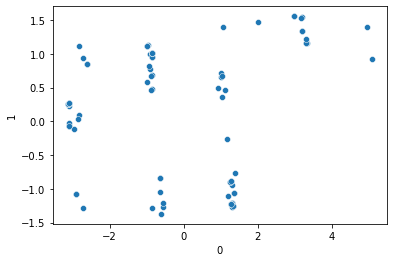

In [50]:
y = data[17]
names = data[0]
X = data.loc[:, 1:16]

'''2D visualise'''
pca = PCA(n_components=2, random_state=42)
pca_projected = pca.fit_transform(X)
pca_projected = pd.DataFrame(pca_projected)

plt.figure(1)
sns.scatterplot(data=pca_projected, x=0, y=1, palette='hls')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [51]:
'''Random Forest'''

param_grid = {'forest__max_depth': [1,2,3,4,5,6,7,8,9,10], }
pipe = Pipeline(steps=[('scaler', StandardScaler()), ('forest', RandomForestClassifier())])

model = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)

print("Best parameters: {}".format(model.best_params_))
print("Best cross-validation score: {:.2f}".format(model.best_score_))

print('Train accuracy {}'.format(model.score(X_train, y_train)))
print('Test accuracy {}'.format(model.score(X_test, y_test)))

C:\Users\lewiis\.conda\envs\deep_learning\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best parameters: {'forest__max_depth': 6}
Best cross-validation score: 0.97
Train accuracy 1.0
Test accuracy 0.9615384615384616


In [52]:
'''Logistic regression'''

param_grid = {'log_reg__C': [0.001,0.01,0.1,1.,10,100], 'log_reg__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'log_reg__l1_ratio': [0, 0.5, 1]}
pipe = Pipeline(steps=[('scaler', StandardScaler()),('log_reg', LogisticRegression())])

model = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)

print("Best parameters: {}".format(model.best_params_))
print("Best cross-validation score: {:.2f}".format(model.best_score_))

print('Train accuracy', model.score(X_train, y_train))
print('Test accuracy', model.score(X_test, y_test))

C:\Users\lewiis\.conda\envs\deep_learning\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best parameters: {'log_reg__C': 1.0, 'log_reg__l1_ratio': 0, 'log_reg__solver': 'newton-cg'}
Best cross-validation score: 0.96
Train accuracy 1.0
Test accuracy 0.9615384615384616


C:\Users\lewiis\.conda\envs\deep_learning\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


In [53]:
'''Linear SVC'''

param_grid = {'LSVC__C': [0.001,0.01,0.1,1.,10,100], 'LSVC__penalty': ['l1', 'l2']}
pipe = Pipeline(steps=[('scaler', StandardScaler()),('LSVC', LinearSVC(max_iter=100000))])

model = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)

print("Best parameters: {}".format(model.best_params_))
print("Best cross-validation score: {:.2f}".format(model.best_score_))

print('Train accuracy', model.score(X_train, y_train))
print('Test accuracy', model.score(X_test, y_test))

C:\Users\lewiis\.conda\envs\deep_learning\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best parameters: {'LSVC__C': 10, 'LSVC__penalty': 'l2'}
Best cross-validation score: 0.99
Train accuracy 1.0
Test accuracy 0.9615384615384616


C:\Users\lewiis\.conda\envs\deep_learning\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.88              nan 0.90666667        nan 0.92
        nan 0.97333333        nan 0.98666667        nan 0.98666667]
  warnings.warn(


In [54]:
'''SVC'''

param_grid = {'svc__C': [0.001,0.01,0.1,1.,10,100], 'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'svc__degree':[1,2,3,4,5,6,7,8,9]}
pipe = Pipeline(steps=[('scaler', StandardScaler()),('svc', SVC())])

model = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)

print("Best parameters: {}".format(model.best_params_))
print("Best cross-validation score: {:.2f}".format(model.best_score_))

print('Train accuracy', model.score(X_train, y_train))
print('Test accuracy', model.score(X_test, y_test))

C:\Users\lewiis\.conda\envs\deep_learning\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best parameters: {'svc__C': 1.0, 'svc__degree': 1, 'svc__kernel': 'linear'}
Best cross-validation score: 0.97
Train accuracy 1.0
Test accuracy 0.8846153846153846
